In [11]:
import charlie_functions
import config
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

%matplotlib inline

In [32]:
game_list = charlie_functions.get_games(2009,2019)

[{'away_id': 227,
  'away_name': 'Boston College Eagles',
  'away_pitcher_note': '',
  'away_probable_pitcher': '',
  'away_score': 1,
  'current_inning': 7,
  'doubleheader': 'N',
  'game_date': '2009-02-25',
  'game_datetime': '2009-02-25T18:05:00Z',
  'game_id': 257211,
  'game_num': 1,
  'game_type': 'E',
  'home_id': 111,
  'home_name': 'Boston Red Sox',
  'home_pitcher_note': '',
  'home_probable_pitcher': '',
  'home_score': 7,
  'inning_state': 'Middle',
  'losing_pitcher': 'Kyle Prohovich',
  'losing_team': 'Boston College Eagles',
  'save_pitcher': None,
  'status': 'Final',
  'summary': '2009-02-25 - Boston College Eagles (1) @ Boston Red Sox (7) (Final)',
  'winning_pitcher': 'Junichi Tazawa',
  'winning_team': 'Boston Red Sox'},
 {'away_id': 144,
  'away_name': 'Atlanta Braves',
  'away_pitcher_note': '',
  'away_probable_pitcher': '',
  'away_score': 4,
  'current_inning': 9,
  'doubleheader': 'N',
  'game_date': '2009-02-25',
  'game_datetime': '2009-02-25T18:05:00Z',
  

In [33]:
game_list[:3]

[{'away_id': 227,
  'away_name': 'Boston College Eagles',
  'away_pitcher_note': '',
  'away_probable_pitcher': '',
  'away_score': 1,
  'current_inning': 7,
  'doubleheader': 'N',
  'game_date': '2009-02-25',
  'game_datetime': '2009-02-25T18:05:00Z',
  'game_id': 257211,
  'game_num': 1,
  'game_type': 'E',
  'home_id': 111,
  'home_name': 'Boston Red Sox',
  'home_pitcher_note': '',
  'home_probable_pitcher': '',
  'home_score': 7,
  'inning_state': 'Middle',
  'losing_pitcher': 'Kyle Prohovich',
  'losing_team': 'Boston College Eagles',
  'save_pitcher': None,
  'status': 'Final',
  'summary': '2009-02-25 - Boston College Eagles (1) @ Boston Red Sox (7) (Final)',
  'winning_pitcher': 'Junichi Tazawa',
  'winning_team': 'Boston Red Sox'},
 {'away_id': 144,
  'away_name': 'Atlanta Braves',
  'away_pitcher_note': '',
  'away_probable_pitcher': '',
  'away_score': 4,
  'current_inning': 9,
  'doubleheader': 'N',
  'game_date': '2009-02-25',
  'game_datetime': '2009-02-25T18:05:00Z',
  

In [34]:
def parse_game(game):
    game_parsed = {'gameid' : game['game_id'],
                   'game_end_datetime' : game['game_datetime'],
                   'game_date' : game['game_date'],
                   'home_id' : game['home_id'],
                   'away_id' : game['away_id'],
                   'status' : game['status']
    }
    
    return game_parsed

In [12]:
regular_season_games = []
for item in game_list:
    if item['game_type'] != 'R':
        pass
    else:
        regular_season_games.append(parse_game(item))

In [13]:
len(regular_season_games)

27148

In [36]:
count_r =0
count_else = 0
for item in game_list:
    if item['game_type'] == 'R':
        count_r += 1
    else:
        count_else += 1
count_r,count_else


(27148, 6104)

In [24]:
162*15*10

24300

In [16]:
df = pd.DataFrame(regular_season_games)

In [17]:
df.head()

,away_id,game_date,game_end_datetime,gameid,home_id,status
0,144,2009-04-05,2009-04-06T00:00:00Z,244193,143,Final
1,121,2009-04-06,2009-04-06T17:10:00Z,244201,113,Final
2,114,2009-04-06,2009-04-06T18:05:00Z,244195,140,Final
3,118,2009-04-06,2009-04-06T18:05:00Z,244198,145,Postponed
4,139,2009-04-06,2009-04-06T18:05:00Z,244205,111,Postponed


In [20]:
df[['gameid','game_end_datetime','game_date','status','away_id','home_id']]
df['game_end_datetime'] = df['game_end_datetime'].map(lambda x: x.replace('T',' ').strip('Z'))
duplicate_games = df[df['gameid'].duplicated(keep=False)==True]['gameid']
df.drop(duplicate_games.index, inplace=True)

In [46]:
df = df[['gameid','game_end_datetime','game_date','status','home_id','away_id']]

In [47]:
df.head()

,gameid,game_end_datetime,game_date,status,home_id,away_id
0,244193,2009-04-06 00:00:00,2009-04-05,Final,143,144
1,244201,2009-04-06 17:10:00,2009-04-06,Final,113,121
2,244195,2009-04-06 18:05:00,2009-04-06,Final,140,114
5,244196,2009-04-06 19:40:00,2009-04-06,Final,109,115
6,244200,2009-04-06 20:05:00,2009-04-06,Final,110,147


In [2]:
import mysql.connector as mysql

mydb = mysql.connect(
  host=config.host,
  user=config.admin,
  passwd=config.password,
  database='MLB_Stats'
)

mycursor = mydb.cursor()

In [3]:
import query_helper

In [6]:
query_helper.set_database_name("MLB_Stats")
query_helper.connect("MLB_Stats")

In [7]:
df_temp = query_helper.query_to_df("""select 
i.home_team_runs + i.away_team_runs as total_runs, i.temp
from 
MLB_Stats.game_info i;""")

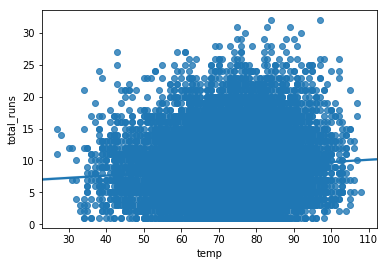

In [10]:
sns.regplot(df_temp['temp'], df_temp['total_runs'])


In [21]:
temps = df_temp['temp']
totals =df_temp['total_runs']

temp_std = np.std(temps)
total_std = np.std(totals)

temp_mean = np.mean(temps)
totals_mean = np.mean(totals)

temp_diff = temps - temp_mean
totals_diff = totals - totals_mean



covariance = np.sum(temp_diff * totals_diff)/len(totals_diff)
correl_coeff = covariance / (temp_std * total_std)

In [22]:
covariance, correl_coeff

(4.107817017414246, 0.08597103126740588)

In [23]:
temp_mean, totals_mean

(73.33539759127693, 8.81254511606702)

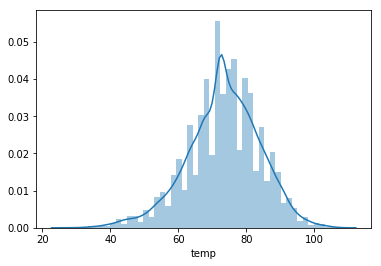

In [24]:
sns.distplot(temps)

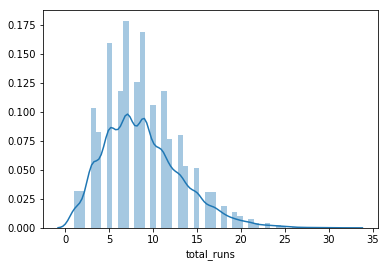

In [26]:
sns.distplot(totals)

In [27]:
scipy_regression = stats.linregress(temps, totals)

LinregressResult(slope=0.035548541177749984, intercept=6.205578715006844, rvalue=0.08597103126740013, pvalue=2.2803020585884567e-44, stderr=0.002539358717834215)

In [29]:
import statsmodels

In [31]:
model = statsmodels.regression.linear_model.OLS(totals, temps)
results = model.fit()

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_runs   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                 9.924e+04
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:44:02   Log-Likelihood:                -77048.
No. Observations:               26321   AIC:                         1.541e+05
Df Residuals:                   26320   BIC:                         1.541e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp           0.1184      0.000    315.020      0.000       0.118       0.119
==============================================================================
Omnibus:                     1881.914   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2355.812
Skew:                           0.675   Prob(JB):                         0.00
Kurtosis:                       3.571   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
statsmodels.stats.anova